## Usage

Start by importing `staaax` (and other packages you want to use):

In [1]:
import numpy as np
import sax
import staaax
import matplotlib.pyplot as plt

Define a Stack of Layers

In [2]:
ns = [1, 2, 3+0.001j, 1]
ds = [1, 0.5]

Further define the (angular) wavenumber and parallel part of the wavevector (determining the angle of incidence)

In [3]:
wl = 1.5
theta_0=np.deg2rad(20)
k0 = 2*np.pi/wl
kx = k0*np.sin(theta_0)

You can then create a `sax` model for the stack by

In [4]:
stack, info = staaax.stratified(
  ds, ns, k0, kx, pol="s"
)

It can straightforwardly be evaluated by

In [5]:
S = stack()
S

{('in', 'in'): Array(-0.5873977-0.15499389j, dtype=complex128),
 ('in', 'out'): Array(-0.21897046+0.76053108j, dtype=complex128),
 ('out', 'in'): Array(-0.21897046+0.76053108j, dtype=complex128),
 ('out', 'out'): Array(-0.58160083-0.17977267j, dtype=complex128)}

Because it is a valid sax model, we can use the typical sax functionality. Including `vmap`s and differentiation. The typical wavelength batching also works:

In [6]:
k0s = np.linspace(2, 6, 101)

Because of JIT compilation repeated evaluation of stack for different parameters is fast.

In [7]:
%timeit stack(k0=k0s)

10.9 ms ± 336 μs per loop (mean ± std. dev. of 7 runs, 1 loop each)


Text(0.5, 1.0, 'Reflectance for different $k_0$')

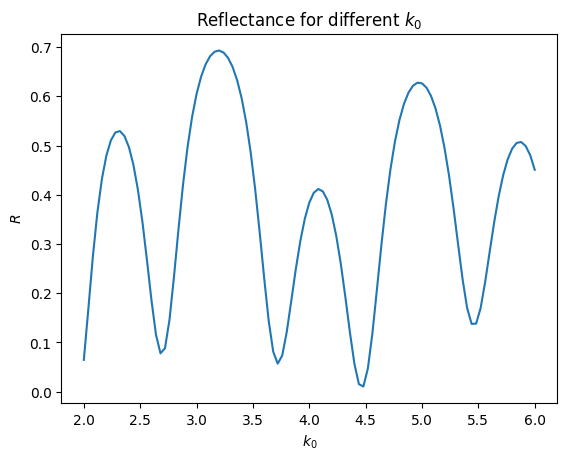

In [8]:
S = stack(k0=k0s)
plt.plot(k0s, np.abs(S['in', 'in'])**2)
plt.xlabel(r'$k_0$')
plt.ylabel(r'$R$')
plt.title('Reflectance for different $k_0$')

In principle arbitrary parameters can be used as batch settings. In this case let's sweep the refractive index of the incident half space:

In [9]:
settings = sax.get_settings(stack)
ni = np.linspace(1, 2, 21)
batch_settings = sax.update_settings(settings, 'if_0', ni=ni)

Text(0.5, 1.0, 'Reflectance for $n_i$')

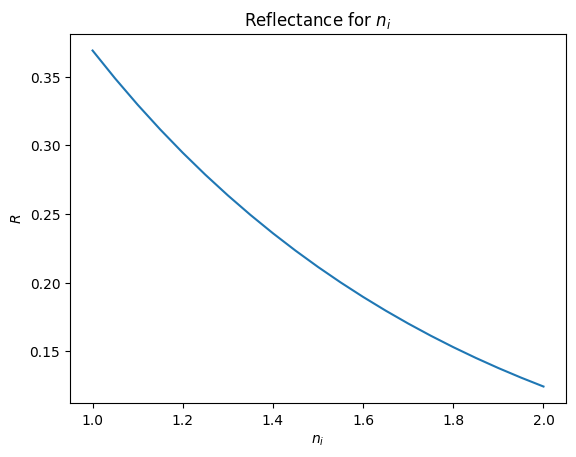

In [10]:
S = stack(**batch_settings)
plt.plot(ni, np.abs(S['in', 'in'])**2)
plt.xlabel(r'$n_i$')
plt.ylabel(r'$R$')
plt.title('Reflectance for $n_i$')